# Practical Question

### Installing requirements
We need to have `pillow` package for processing image.

In [5]:
!pip install pillow

In [6]:
from PIL import Image

### Defining `get_image_bits` functions (1)
This functions is gonna return the bits-per-pixel.

In [7]:
def get_image_bits(image_path):
    try:
        # Open the image
        img = Image.open(image_path)

        # Get the number of bits per pixel
        mode  = img.mode

        bits_per_pixel = len(mode) * 8

        return bits_per_pixel

    except FileNotFoundError:
        print(f"Error: The file at '{image_path}' was not found.")
        return None

Now we can get the image bits-per-pixel

In [8]:
image_path = "../../campusdrive.png"

bits = get_image_bits(image_path)
print(f"The image at {image_path} has {bits} bits per pixel.")

The image at ../../campusdrive.png has 8 bits per pixel.


### Bit-Per-Pixel Reduction (2)
Now we can define a function to reduce the bit-per-pixel rate for an image.

In [22]:
from PIL import Image
import os

def reduce_bits_and_save(input_path, output_folder, start_bits=8, end_bits=1):
  try:
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Open the image
    img = Image.open(input_path)

    # Convert to grayscale ("L" mode)
    img = img.convert("L")

    # Iterate over the desired bit depths
    for target_bits in range(start_bits, end_bits - 1, -1):
      # Create a new image with the specified bit depth
      reduced_img = Image.new("L", img.size)

      # Extract the desired bits from each pixel
      for x in range(img.width):
        for y in range(img.height):
          pixel_value = img.getpixel((x, y))
          reduced_pixel_value = pixel_value & ((1 << target_bits) - 1)
          reduced_img.putpixel((x, y), reduced_pixel_value)

      # Construct the output file path
      output_path = os.path.join(output_folder, f"{os.path.basename(input_path).split('.')[0]}_{target_bits}bits.png")

      # Save the reduced-bit image
      reduced_img.save(output_path)
      print(f"Image saved: {output_path}")

  except FileNotFoundError:
    print(f"Error: The file at '{input_path}' was not found.")
  except Exception as e:
    print(f"Error processing the image: {str(e)}")

In [23]:

input_image_path = "../../campusdrive.png"
output_folder_path = "image-reduction-results"
start_bits = 8  # Set the starting bit depth
end_bits = 1    # Set the ending bit depth

reduce_bits_and_save(input_image_path, output_folder_path, start_bits, end_bits)

Image saved: image-reduction-results\campusdrive_8bits.png
Image saved: image-reduction-results\campusdrive_7bits.png
Image saved: image-reduction-results\campusdrive_6bits.png
Image saved: image-reduction-results\campusdrive_5bits.png
Image saved: image-reduction-results\campusdrive_4bits.png
Image saved: image-reduction-results\campusdrive_3bits.png
Image saved: image-reduction-results\campusdrive_2bits.png
Image saved: image-reduction-results\campusdrive_1bits.png


### The Result

In [11]:
import matplotlib.pyplot as plt

def show_images(folder_path, num_images=8):
    # Get a list of all files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Choose the number of images you want to display
    num_images = min(len(image_files), num_images)
    
    # Reverse the order of the images
    image_files = image_files[::-1]

    # Create a 2x4 grid for displaying the images
    fig, axes = plt.subplots(2, 4, figsize=(10, 5))

    # Flatten the 2D array of subplots for easier indexing
    axes = axes.flatten()

    # Loop through the images and display them in the subplots
    for i in range(num_images):
        image_path = os.path.join(folder_path, image_files[i])
        img = Image.open(image_path)

        axes[i].imshow(img, cmap='gray')  # Display in grayscale
        axes[i].axis('off')  # Turn off axis labels for cleaner display

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

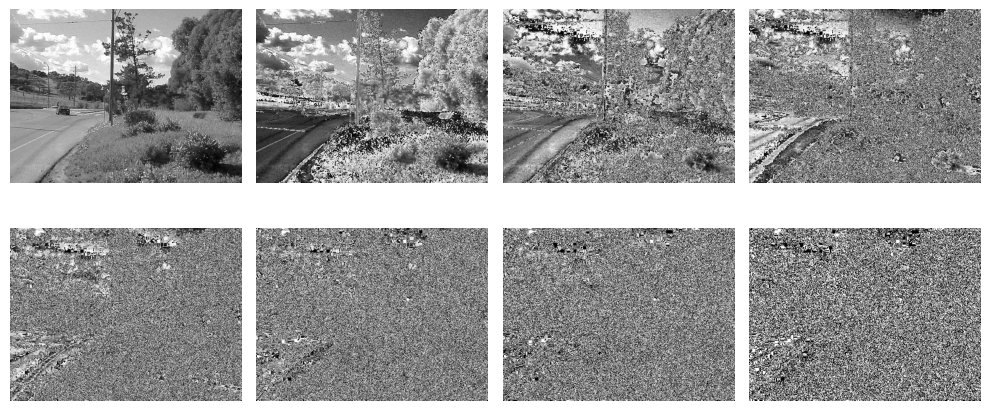

In [12]:
folder_path = "image-reduction-results"
show_images(folder_path)

### Define Mask Generator Function (3)

In [13]:
import numpy as np

def generate_random_mask(image_size):
  # Generate a random mask with values of 0 or 1
  mask = np.random.randint(2, size=image_size, dtype=np.uint8)
  return mask

### Define Mask Apply Function

In [14]:
def apply_quantization_with_mask(original_img, mask, target_bits):
  # Create a new image with the specified bit depth
  reduced_img = Image.new("L", original_img.size)

  # Extract the desired bits from each pixel based on the mask
  for x in range(original_img.width):
    for y in range(original_img.height):
      pixel_value = original_img.getpixel((x, y))

      # Apply quantization only if the corresponding mask value is 1
      if mask[y, x] == 1:
        reduced_pixel_value = pixel_value & ((1 << target_bits) - 1)
      else:
        reduced_pixel_value = pixel_value

      reduced_img.putpixel((x, y), reduced_pixel_value)

  return reduced_img

Now we can make modifications on `reduce_bits_and_save` to make `reduce_bits_and_save_with_mask` function to apply the above mask on the images.

In [15]:

def reduce_bits_and_save_with_mask(input_path, output_folder, start_bits=8, end_bits=1):
    try:
        # Create output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        # Open the original image
        original_img = Image.open(input_path)

        # Convert to grayscale ("L" mode)
        original_img = original_img.convert("L")

        # Iterate over the desired bit depths
        for target_bits in range(start_bits, end_bits - 1, -1):
            # Generate a random mask for each quantization bit change
            mask = generate_random_mask((original_img.height, original_img.width))

            # Apply quantization with the generated mask
            reduced_img = apply_quantization_with_mask(original_img, mask, target_bits)

            # Save the reduced-bit image
            output_path = os.path.join(output_folder, f"{os.path.basename(input_path).split('.')[0]}_{target_bits}bits_masked.png")
            reduced_img.save(output_path)

        return original_img, output_folder, start_bits, end_bits

    except FileNotFoundError:
        print(f"Error: The file at '{input_path}' was not found.")
    except Exception as e:
        print(f"Error processing the image: {str(e)}")

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

In [16]:
input_image_path = "../../campusdrive.png"
output_folder_path = "image-reduction-results-with-mask"
start_bits = 8  # Set the starting bit depth
end_bits = 1    # Set the ending bit depth

result = reduce_bits_and_save_with_mask(input_image_path, output_folder_path, start_bits, end_bits)

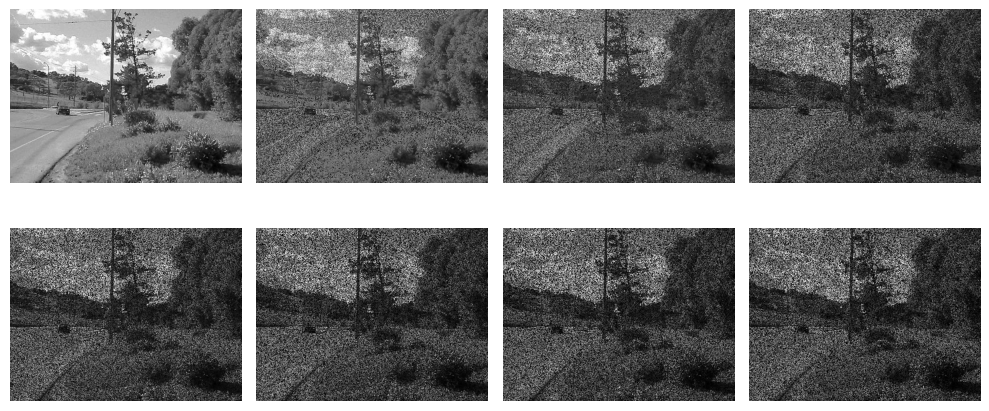

In [18]:
folder_path = "image-reduction-results-with-mask"
show_images(folder_path)

### Get File Info Function - Image Compression (4)

In [27]:
def get_image_info(file_path):
  try:
    # Open the image
    img = Image.open(file_path)

    # Get image size
    image_size = img.size  # (width, height)

    # Get bit depth
    bit_depth = img.bits if hasattr(img, 'bits') else 8  # Default to 8 bits if not available

    # Get file size
    file_size = os.path.getsize(file_path)  # in bytes

    # Calculate compression percentage
    original_size = image_size[0] * image_size[1] * bit_depth / 8  # in bytes
    compression_percentage = ((original_size - file_size) / original_size) * 100

    return {
      'image_size': image_size,
      'original_size': original_size,
      'bit_depth': bit_depth,
      'file_size': file_size,
      'compression_percentage': compression_percentage
    }

  except FileNotFoundError:
    print(f"Error: The file at '{file_path}' was not found.")
  except Exception as e:
    print(f"Error processing the image: {str(e)}")

In [28]:
file_path = "../../SharifLogo.png"
result = get_image_info(file_path)

if result:
  print(f"Image Size: {result['image_size']}")
  print(f"Image Original Size: {result['original_size']}")
  print(f"Bit Depth: {result['bit_depth']} bits per pixel")
  print(f"File Size: {result['file_size']} bytes")
  print(f"Compression Percentage: {result['compression_percentage']:.2f}%")


Image Size: (955, 956)
Image Original Size: 912980.0
Bit Depth: 8 bits per pixel
File Size: 140341 bytes
Compression Percentage: 84.63%


### Image Enhancement (5)
First of all we need to install requirements for creating gif using images.

In [29]:
!pip install imageio

In [47]:
from PIL import Image
import numpy as np
import os

def traumatize_and_save_images(input_path, output_folder, num_steps=10):
  try:
      # Create output folder if it doesn't exist
      os.makedirs(output_folder, exist_ok=True)

      # Open the original image
      original_img = Image.open(input_path)

      # Convert to grayscale if the image is in color
      original_img = original_img.convert("L")

      # Get the pixel data as a NumPy array
      pixels = np.array(original_img)

      # Calculate the step size for traumatizing
      step_size = 1.0 / num_steps

      # Traumatize the image gradually and save at each step
      for i in range(num_steps + 1):
        # Create a copy of the original pixel data
        traumatized_pixels = pixels.copy()

        # Apply non-linear transformation to pixel values
        traumatized_pixels = apply_non_linear_transformation(traumatized_pixels, i * step_size)

        # Create a new image from the traumatized pixel data
        traumatized_img = Image.fromarray(traumatized_pixels)

        # Save the traumatized image
        output_path = os.path.join(output_folder, f"traumatized_{i}.png")
        traumatized_img.save(output_path)

      return output_folder

  except FileNotFoundError:
    print(f"Error: The file at '{input_path}' was not found.")
  except Exception as e:
    print(f"Error processing the image: {str(e)}")

def apply_non_linear_transformation(pixels, factor):
  # Apply a non-linear transformation to the pixel values
  return np.clip(pixels - factor * pixels**2, 0, 255).astype(np.uint8)

In [53]:
import imageio
import os

def create_gif(input_folder, output_path, duration=0.5):
    try:
        # Get the list of traumatized images
        traumatized_images = [f for f in os.listdir(input_folder) if f.startswith("traumatized_")]

        # Sort the images based on the index in the filename
        traumatized_images.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

        # Create a gif from the traumatized images
        with imageio.get_writer(output_path, duration=duration) as writer:
            for image in traumatized_images:
                image_path = os.path.join(input_folder, image)
                img = imageio.imread(image_path)
                writer.append_data(img)

        return output_path

    except Exception as e:
        print(f"Error creating the gif: {str(e)}")

In [55]:
input_image_path = "../../bigMasoud.jpg"
traumatized_images_folder = "darkened_images"
output_gif_path = "darkened_images/Traumatized_bigMasoud.gif"

darkened_images_folder = traumatize_and_save_images(input_image_path, traumatized_images_folder, num_steps=10)
create_gif(traumatized_images_folder, output_gif_path, duration=0.5)

C:\Users\Ryan PG\AppData\Local\Temp\ipykernel_6620\3181958879.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_path)


'darkened_images/Traumatized_bigMasoud.gif'

### Histogram (6)

In [61]:
def display_and_save_histogram(image_path, output_path, image_name):
  try:
    # Open the image
    img = Image.open(image_path)

    # Convert to RGB (if not already in RGB mode)
    img = img.convert("RGB")

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Calculate the histogram for each channel
    hist_r, bin_edges_r = np.histogram(img_array[:, :, 0].ravel(), bins=256, range=[0, 256])
    hist_g, bin_edges_g = np.histogram(img_array[:, :, 1].ravel(), bins=256, range=[0, 256])
    hist_b, bin_edges_b = np.histogram(img_array[:, :, 2].ravel(), bins=256, range=[0, 256])

    # Plot the histograms
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.plot(hist_r, color='red')
    plt.title(f'Red Channel Histogram - {image_name}')

    plt.subplot(132)
    plt.plot(hist_g, color='green')
    plt.title(f'Green Channel Histogram - {image_name}')

    plt.subplot(133)
    plt.plot(hist_b, color='blue')
    plt.title(f'Blue Channel Histogram - {image_name}')

    plt.tight_layout()
    plt.show()

    # Create output folder if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # Save the histograms as images
    plt.savefig(f"{output_path}/Histogram_{image_name}.png")

  except FileNotFoundError:
    print(f"Error: The file at '{image_path}' was not found.")
  except Exception as e:
    print(f"Error processing the image: {str(e)}")

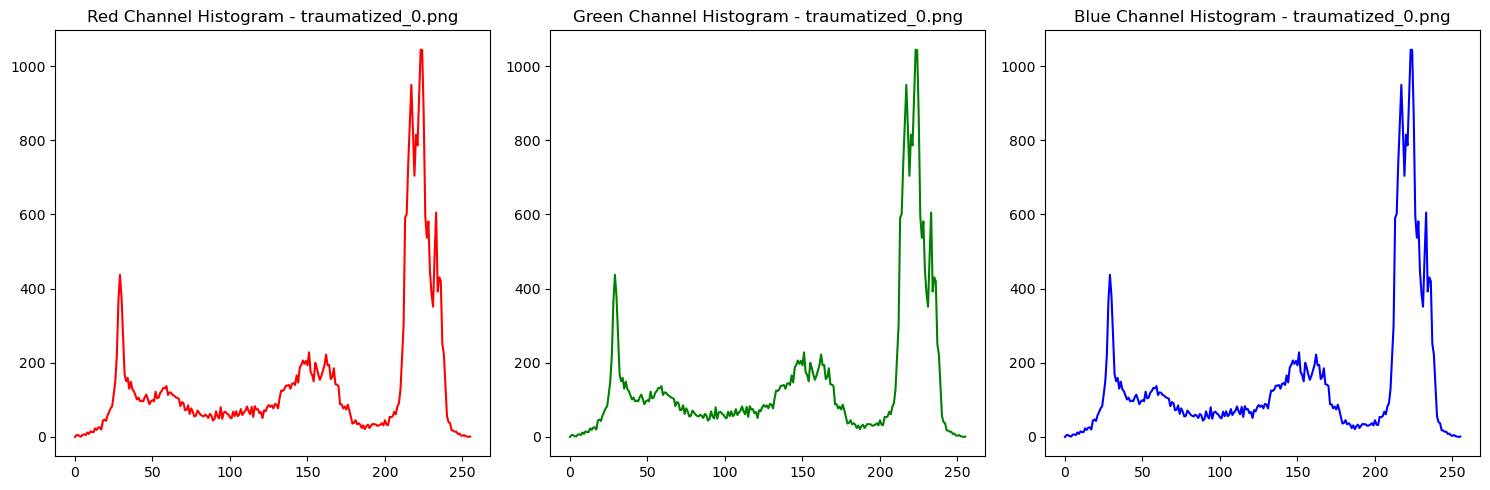

<Figure size 640x480 with 0 Axes>

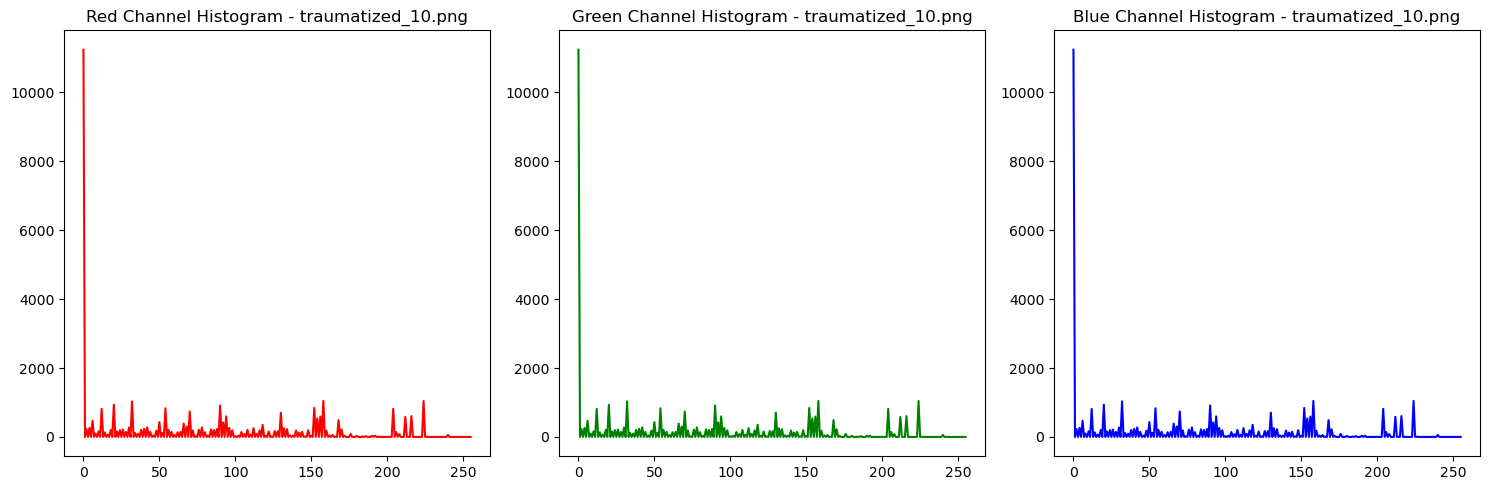

<Figure size 640x480 with 0 Axes>

In [62]:

# Example usage
output_path = "histograms"
image1_path = "./darkened_images/traumatized_0.png"
image2_path = "./darkened_images/traumatized_10.png"

# Display and save histogram for Image1
display_and_save_histogram(image1_path, output_path, image1_path.split('/')[-1])

# Display and save histogram for Image2
display_and_save_histogram(image2_path, output_path, image2_path.split('/')[-1])
